In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

In [2]:
def protonate_ali_amino2(mol):
    atoms=[x for x in mol.GetAtoms()] 
    ind=[x.GetIdx() for x in atoms]
    atom_num=[x.GetAtomicNum() for x in atoms]
    atom_hyb=[x.GetHybridization() for x in atoms]
    comb=list(zip(ind,atom_num))   
    a=[i for i,j in comb if j==7] #N
    b=[i for i,j in comb if j==16] #S
    c=[[i+1, i-1, i+2, i-2, i+3, i-3, i+4, i-4, i+5, i-5] for i,j in comb if j==7] 
    m=[]
    for i in b:#index of s
        for j in c:#index of sourounding
            for k in j:
                m.append(i)
                
    for at in mol.GetAtoms(): 
        if at.GetAtomicNum() == 7 and at.GetHybridization()==rdkit.Chem.rdchem.HybridizationType.SP3 and at.GetFormalCharge()==0:
            if m in c: #if s in  list of sorrounding index
                at.SetFormalCharge(0)
    
        elif at.GetAtomicNum() == 7 and at.GetHybridization()==rdkit.Chem.rdchem.HybridizationType.SP3 and at.GetFormalCharge()==0:
            at.SetFormalCharge(1)
    
        
    return mol
        

In [3]:
x=Chem.MolFromSmiles('n1[nH]c(=O)n(c12)cccc2C(=O)N(C3)CCC3S(=O)(=O)NC(C)C')

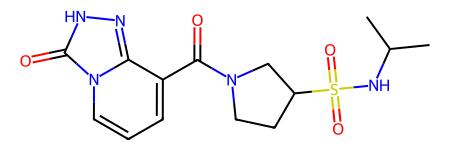

In [4]:
x

In [5]:
x2=Chem.MolFromSmiles('n1[nH]c(=O)n(c12)CCN(C2)S(=O)(=O)N')

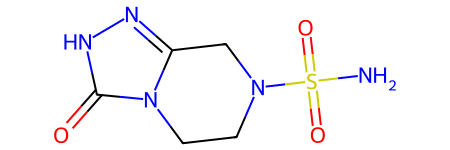

In [6]:
x2

In [11]:
x3=Chem.MolFromSmiles('CS(=O)(=O)NCCS(=O)(=O)[N+]C(C1)C(C12)CC(=O)O2')

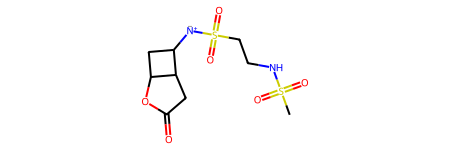

In [12]:
x3

In [13]:
y=Chem.MolFromSmiles('N#CC1=CC=C([C@@H](NC(=O)C2=CN(CC[NH3+])N=C2)C2=CC=C(Cl)C=C2)C=C1')

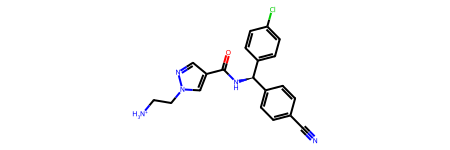

In [14]:
y

In [15]:
y2=Chem.MolFromSmiles('CC1=CC=C(NC(=O)[C@H]([NH3+])CC2=NC=CN2C)C=C1C(=O)C1=CC=CC=C1')

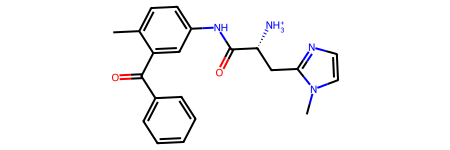

In [16]:
y2